In [1]:
import pandas as pd

In [2]:
sots_lahutus = pd.read_csv("sots_lahutus.csv")
pikkus_lahutuseni = pd.read_csv("abielu_pikkus.csv")
maakond_lahutus = pd.read_csv("maakond_lahutus.csv")
kuud_maakonnad_lahutus = pd.read_csv("kuud_maakonnad_lahutus.csv")
abielud_kuud_maakonnad = pd.read_csv("abielud_kuud_maakonnad.csv")
abielud_vanused_sood = pd.read_csv("abielud_vanused_sood_maakonnad.csv")
sots_abielu = pd.read_csv("sots_abielud.csv")

In [3]:
sots_lahutus['Elukoht'] = sots_lahutus['Elukoht'].str.replace('..linnaline ja väikelinnaline asustuspiirkond\xa0\xa0','Linnaline ja väikelinnaline asustuspiirkond')
sots_lahutus['Elukoht'] = sots_lahutus['Elukoht'].str.replace('..maaline asustuspiirkond','Maaline asustuspiirkond')

pikkus_lahutuseni['Elukoht'] = pikkus_lahutuseni['Elukoht'].str.replace('linnaline ja väikelinnaline asustuspiirkond','Linnaline ja väikelinnaline asustuspiirkond')
pikkus_lahutuseni['Elukoht'] = pikkus_lahutuseni['Elukoht'].str.replace('maaline asustuspiirkond','Maaline asustuspiirkond')

sots_lahutus = sots_lahutus.rename(columns={"Elukoht":"Asustuspiirkond"})
pikkus_lahutuseni = pikkus_lahutuseni.rename(columns={"Elukoht":"Asustuspiirkond"})
maakond_lahutus = maakond_lahutus.rename(columns= {"Asustuspiirkonna liik" : "Asustuspiirkond"})

C:\Users\evalotta\AppData\Local\Temp/ipykernel_17880/1961290838.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sots_lahutus['Elukoht'] = sots_lahutus['Elukoht'].str.replace('..linnaline ja väikelinnaline asustuspiirkond\xa0\xa0','Linnaline ja väikelinnaline asustuspiirkond')
C:\Users\evalotta\AppData\Local\Temp/ipykernel_17880/1961290838.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sots_lahutus['Elukoht'] = sots_lahutus['Elukoht'].str.replace('..maaline asustuspiirkond','Maaline asustuspiirkond')


In [4]:
pikkus2017 = pikkus_lahutuseni.query("Aasta == 2017 & Sugu == 'Mehed'")
pikkus2017 = pikkus2017.drop(columns=["Sugu", "Aasta"])

sots2017 = sots_lahutus.query("Sugu == 'Mehed'")
sots2017 = sots2017.drop(columns=["Sugu", "Aasta"])

In [5]:
kokku = sots2017.merge(pikkus2017, on=["Asustuspiirkond", "Vanuserühm", "Kokku"])

maaline = kokku.query("Asustuspiirkond == 'Maaline asustuspiirkond'")
linnaline = kokku.query("Asustuspiirkond == 'Linnaline ja väikelinnaline asustuspiirkond'")

In [6]:
maakond_lahutus['Mehe elukoht'] = maakond_lahutus['Mehe elukoht'].str.replace('..Tallinn','Tallinn')
kuud_maakonnad_lahutus['Mehe elukoht'] = kuud_maakonnad_lahutus['Mehe elukoht'].str.replace('..Tallinn','Tallinn')
maakond_lahutus = maakond_lahutus.rename(columns={"Mehe elukoht":"Elukoht"})
kuud_maakonnad_lahutus = kuud_maakonnad_lahutus.rename(columns={"Mehe elukoht":"Elukoht"})
kuud_maakonnad_lahutus = kuud_maakonnad_lahutus.rename(columns={"Kuud kokku":"Lahutused kokku"})

C:\Users\evalotta\AppData\Local\Temp/ipykernel_17880/3113499986.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  maakond_lahutus['Mehe elukoht'] = maakond_lahutus['Mehe elukoht'].str.replace('..Tallinn','Tallinn')
C:\Users\evalotta\AppData\Local\Temp/ipykernel_17880/3113499986.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  kuud_maakonnad_lahutus['Mehe elukoht'] = kuud_maakonnad_lahutus['Mehe elukoht'].str.replace('..Tallinn','Tallinn')


In [7]:
kuud_maakonnad_koos = kuud_maakonnad_lahutus.assign(Lastetu = maakond_lahutus["0 last"],
                                  Üks_laps = maakond_lahutus["1 laps"],
                                  Kaks_last = maakond_lahutus["2 last"],
                                  Kolm_last = maakond_lahutus["3 last"],
                                  Neli_last = maakond_lahutus["4 last"],
                                  Viis_või_enam_last = maakond_lahutus["5 või enam last"],
                                  Teadmata = maakond_lahutus["Ühiste laste arv teadmata"])

In [14]:
kuud_maakonnad_koos

,Aasta,Asustuspiirkonna liik,Elukoht,Lahutused kokku,Jaanuar,Veebruar,Märts,Aprill,Mai,Juuni,...,Oktoober,November,Detsember,Lastetu,Üks_laps,Kaks_last,Kolm_last,Neli_last,Viis_või_enam_last,Teadmata
0,2017,Linnaline ja väikelinnaline asustuspiirkond,Harju maakond,1398,90,106,128,100,136,104,...,107,146,135,616,458,273,44,7,0,0
1,2017,Linnaline ja väikelinnaline asustuspiirkond,Tallinn,1145,75,84,101,81,110,82,...,94,120,117,529,369,208,33,6,0,0
2,2017,Linnaline ja väikelinnaline asustuspiirkond,Hiiu maakond,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,Linnaline ja väikelinnaline asustuspiirkond,Ida-Viru maakond,352,35,27,29,21,32,30,...,35,35,27,135,140,66,8,3,0,0
4,2017,Linnaline ja väikelinnaline asustuspiirkond,Jõgeva maakond,6,0,2,3,0,0,0,...,0,0,1,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2021,Maaline asustuspiirkond,Saare maakond,35,2,0,5,0,1,4,...,3,1,2,25,18,27,6,0,0,1
152,2021,Maaline asustuspiirkond,Tartu maakond,73,8,1,5,1,5,7,...,9,3,7,11,10,5,1,3,0,1
153,2021,Maaline asustuspiirkond,Valga maakond,31,1,2,0,2,5,5,...,2,2,4,21,8,11,7,0,1,0
154,2021,Maaline asustuspiirkond,Viljandi maakond,47,2,5,2,5,10,6,...,3,3,1,11,8,8,5,1,0,1


       Jaanuar  Veebruar  Märts  Aprill  Mai  Juuni  Juuli  August  September  \
Aasta                                                                           
2017       302       327    385     317  417    315    304     363        380   
2018       309       311    356     323  336    356    354     314        358   
2019       280       282    307     257  296    270    303     316        324   
2020       278       248    255     120  153    273    381     328        362   
2021       143       182    192     212  214    320    543     502        304   

       Oktoober  November  Detsember  
Aasta                                 
2017        364       413        404  
2018        410       359        359  
2019        344       298        300  
2020        314       310        323  
2021        249       239        255  


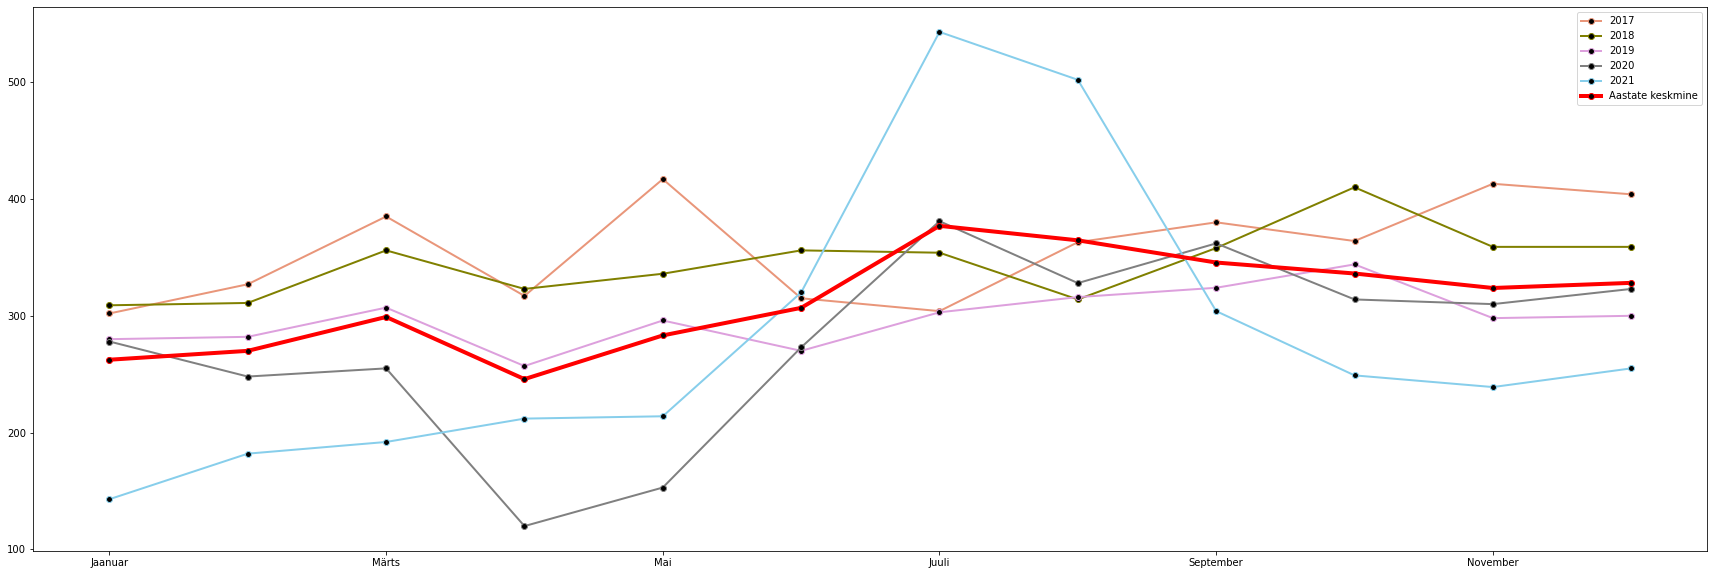

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from calendar import month_name as mn

summad = kuud_maakonnad_koos.groupby("Aasta").sum()
summad= summad.drop(columns = ["Lahutused kokku"])
summadesummad = summad.sum()
kuud = mn[1:]
print(summad)
i = 0

colors = ['darksalmon', 'olive', 'plum', 'gray', 'skyblue']
y= [1312/5, 1350/5, 1495/5, 1229/5, 1416/5, 1534/5, 1885/5, 1823/5, 1728/5,1681/5,1619/5, 1641/5]

for index, row in summad.iterrows():

    row.plot( kind = 'line', color = str(colors[i]),  marker='o', markerfacecolor='black',figsize=(30, 10), label=str(index), linewidth=2)
    i+=1
plt.plot(kuud, y,color = "red", marker='o', markerfacecolor='black', label="Aastate keskmine", linewidth=4)

plt.legend()
plt.show()





In [9]:
sots_lahutus
grupeeritud = sots_lahutus.groupby("Asustuspiirkond").sum()
print(grupeeritud)

                                             Aasta  Kokku  Töötav  Töötu  \
Asustuspiirkond                                                            
Linnaline ja väikelinnaline asustuspiirkond  52442   4816     627    126   
Maaline asustuspiirkond                      52442   1581     257     55   

                                             Pensionär  (Üli)õpilane  Kodune  \
Asustuspiirkond                                                                
Linnaline ja väikelinnaline asustuspiirkond        112            26      44   
Maaline asustuspiirkond                             65             4      10   

                                             Ajateenija  \
Asustuspiirkond                                           
Linnaline ja väikelinnaline asustuspiirkond           0   
Maaline asustuspiirkond                               0   

                                             Lapsehoolduspuhkusel*  \
Asustuspiirkond                                                    